To measure PP1 intensities 

In [21]:
# import necessary modules
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters
import skimage.color as color
from PIL import Image
import pandas as pd
from skimage.util import img_as_float
from skimage.color import label2rgb, rgb2gray,gray2rgb
from skimage import segmentation,morphology,feature,measure
from scipy import ndimage as ndi
import glob
from natsort import natsorted 
import os

In [22]:
# import function file
%run functions.ipynb

In [76]:
# path to the local folder for the notebooks
BASE_DIR="/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/" 
#path to the image folder.
IMAGE_DIR=BASE_DIR + "data/XMovie/"
CSV_DIR = BASE_DIR + "AnalysisMethods/AnalysisResults/XMovie/csvs/"

#### A List for the Images Folders

In [77]:
dmso_path=[IMAGE_DIR + "Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_03_R3D_D3D/",
          IMAGE_DIR + "Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_05_R3D_D3D/",
          IMAGE_DIR + "Expt2020_017_setV_STLC_MG132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_01_R3D_D3D/",
          IMAGE_DIR + "Expt2020_017_setV_STLC_MG132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_02_R3D_D3D/"]

cdki_path=[IMAGE_DIR + "Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_03_R3D_D3D/",
          IMAGE_DIR + "Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_05_R3D_D3D/",
          IMAGE_DIR + "Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_03_R3D_D3D/",
          IMAGE_DIR + "Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_04_R3D_D3D/"]

### Create The DataFrames and CSVs


#### With background correction

In [79]:
# uncomment the path for dmso and cdki and run this cell again

#fol_path=list_cloning(dmso_path)
fol_path=list_cloning(cdki_path)


for i in range(len(fol_path)):
    df_green,df_red=prewitt_method1_BG(fol_path[i])
    df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
    df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
    print("Datapoints before removing the outliers : " ,len(df_bg))
    
    directory=fol_path[i].split('/')[-2].split('.')[0] # to create a folder per experiment to save csvs
    path = os.path.join(CSV_DIR, directory)
    
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    
    
    df_bg.to_csv(CSV_DIR + directory + '/' +'ParticleMeasurements-WithBGCorrection'+'.csv') # write to csv before removing the outliers
    df_bg=outliers(df_bg)
    df_bg.to_csv(CSV_DIR +  directory + '/' + 'ParticleMeasurements-OutlierRemoved-WithBGCorrection'+'.csv') # write to csv after removing the outliers
    print("Datapoints after removing the outliers: " ,len(df_bg))

print("Method 1 with BG Correction is completed for %s folders"%(fol_path))

Datapoints before removing the outliers :  638
Datapoints after removing the outliers:  576
Datapoints before removing the outliers :  478
Datapoints after removing the outliers:  384
Datapoints before removing the outliers :  708
Datapoints after removing the outliers:  640
Datapoints before removing the outliers :  1344
Datapoints after removing the outliers:  1149
Method 1 with BG Correction is completed for ['/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/XMovie/Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_03_R3D_D3D/', '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/XMovie/Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_05_R3D_D3D/', '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_03_R3D_D3D/', '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_04

#### Without Background Correction


In [81]:
# uncomment the path for dmso and cdki and run this cell again

fol_path=list_cloning(dmso_path)
#fol_path=list_cloning(cdki_path)

for i in range(len(fol_path)):
    df_green,df_red=prewitt_method1_noBG(fol_path[i])
    df_No_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
    df_No_bg['intensity_ratio'] = df_No_bg['mean_intensity_green']/df_No_bg['mean_intensity_red']
    print("Datapoints before removing the outliers : " ,len(df_No_bg))
    
    directory=fol_path[i].split('/')[-2].split('.')[0] # to create a folder per experiment to save csvs
    path = os.path.join(CSV_DIR, directory)
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    
    df_No_bg.to_csv(CSV_DIR + directory + '/' + 'ParticleMeasurements-WithOut_BGCorrection'+'.csv') # write to csv before removing the outliers
    df_No_bg=outliers(df_No_bg)
    df_bg.to_csv(CSV_DIR + directory + '/' + 'ParticleMeasurements-OutlierRemoved-WithOut-BGCorrection'+'.csv') # write to csv after removing the outliers
    print("Datapoints after removing the outliers: " ,len(df_No_bg))
    
print("Method 1 without BG Correction is completed for %s folders"%(fol_path))

Datapoints before removing the outliers :  1688
Datapoints after removing the outliers:  1682
Datapoints before removing the outliers :  492
Datapoints after removing the outliers:  487
Datapoints before removing the outliers :  723
Datapoints after removing the outliers:  712
Datapoints before removing the outliers :  846
Datapoints after removing the outliers:  841
Method 1 without BG Correction is completed for ['/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/XMovie/Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_03_R3D_D3D/', '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/XMovie/Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_05_R3D_D3D/', '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/XMovie/Expt2020_017_setV_STLC_MG132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_01_R3D_D3D/', '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/XMovie/Expt2020_017_setV_STLC_MG132_DMSO_mKate2-Astrin_Nuf2

### Plots

In [82]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})

# path to save graphs
GRAPH_DIR=BASE_DIR + "AnalysisMethods/AnalysisResults/XMovie/graphs/"

In [83]:
# plot graphs 
# dmso vs cdki
# The paths are for the generated csv files

dmso_path=[CSV_DIR + "Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_03_R3D_D3D/",
          CSV_DIR + "Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_05_R3D_D3D/",
          CSV_DIR + "Expt2020_017_setV_STLC_MG132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_01_R3D_D3D/",
          CSV_DIR + "Expt2020_017_setV_STLC_MG132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_02_R3D_D3D/"]

cdki_path=[CSV_DIR + "Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_03_R3D_D3D/",
          CSV_DIR + "Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_05_R3D_D3D/",
          CSV_DIR + "Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_03_R3D_D3D/",
          CSV_DIR + "Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_04_R3D_D3D/"]



In [75]:
cdki_path[1]
df_cdki_bg=pd.read_csv(cdki_path[i]+'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv')
df_cdki_bg.head()

,Unnamed: 0,fname_green,mean_intensity_green,fname_red,label,area,eccentricity,perimeter,mean_intensity_red,intensity_ratio


In [72]:
# read both csvs to a dataframe
cell_count=0
df_graph=pd.DataFrame()
for i in range(len(cdki_path)):
    df_cdki_bg=pd.read_csv(cdki_path[i]+'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv')
    df_dmso_bg=pd.read_csv(dmso_path[i]+'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv')
    
    df_temp_cdki=pd.DataFrame(data=(df_cdki_bg['intensity_ratio']))
    df_temp_cdki['condition']='cdki'
    df_temp_cdki['cell']= 'cell_%d'%i
    df_temp_dmso=pd.DataFrame(data=(df_dmso_bg['intensity_ratio']))
    df_temp_dmso['condition']='dmso'
    df_temp_dmso['cell']= 'cell_%d'%i
   
   
    
    df_graph=pd.concat([df_graph,df_temp_cdki,df_temp_dmso],ignore_index=True)

    cell_count+=1

In [73]:
df_graph.head()

,intensity_ratio,condition,cell


In [68]:
# count the number of KTs in CDKi and DMSO
cdki = df_graph[df_graph['condition']=='cdki'].shape[0]
dmso = df_graph[df_graph['condition']=='dmso'].shape[0]

In [69]:
title="Mask to PP1 Intensity Ratio  - CDKi VS DMSO"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x='condition',y='intensity_ratio',color='white',data=df_graph).set_title(title)
sns_plot = sns.swarmplot(s=2,x='condition',y='intensity_ratio',hue='cell',data=df_graph) # change the value for s if all points are not placed in the graph
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(cdki,4), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(dmso,4), horizontalalignment='center',verticalalignment='center')

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 864x864 with 0 Axes>

In [19]:
#generate a dataframe with inverse
df_inverse= df_graph.copy()
df_inverse['intensity_ratio'] = df_graph['intensity_ratio'].apply(lambda x: 1/ x)

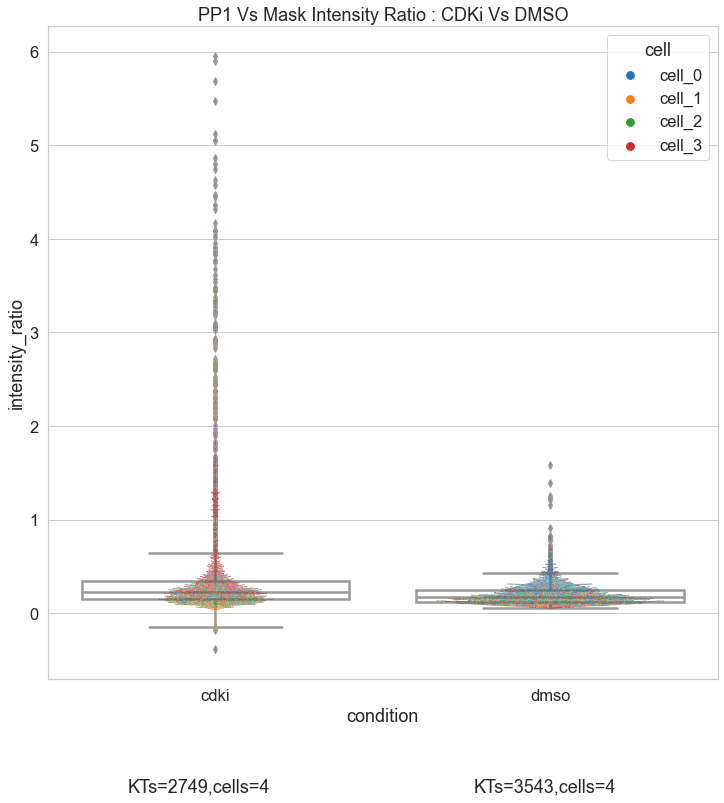

In [20]:
# pp1 to mask


title="PP1 Vs Mask Intensity Ratio : CDKi Vs DMSO"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x='condition',y='intensity_ratio',color='white',data=df_inverse).set_title(title)
sns_plot = sns.swarmplot(s=1,x='condition',y='intensity_ratio',hue='cell',data=df_inverse)
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(cdki,cell_count), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(dmso,cell_count), horizontalalignment='center',verticalalignment='center')


sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()
                                                    

